In [12]:
from sklearn.decomposition import PCA
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

### Question 1: Urothelial Carcinoma In Situ 

#### 1a) Performing PCA

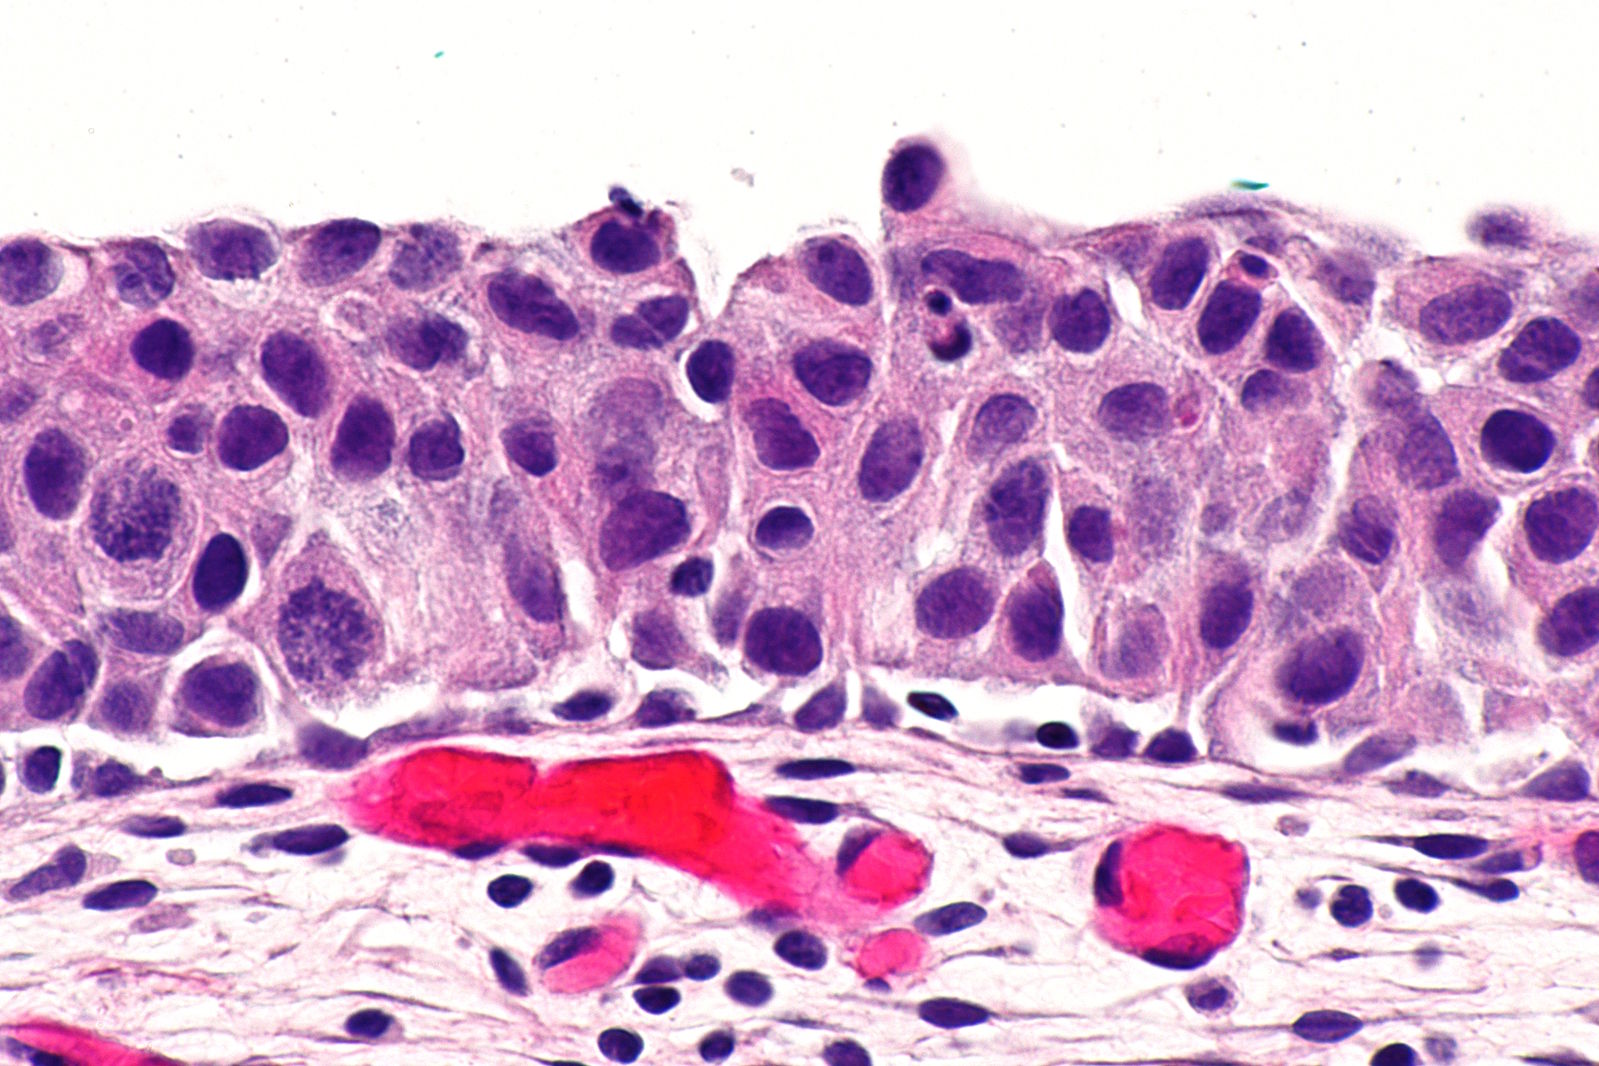

In [11]:
carcinoma_image = Image.open('./Carcinoma_In_Situ.jpg')
carcinoma_image

In [17]:
carcinoma_array = np.array(carcinoma_image)
height, width, channels = carcinoma_array.shape
flattened_array = carcinoma_array.reshape(-1, channels) 

pca = PCA(3)
pca.fit(flattened_array)

reconstructed_image_array = pca.inverse_transform(pca.transform(flattened_array))
reconstructed_image_array = np.clip(reconstructed_image_array, 0, 255).astype(np.uint8)
reconstructed_image_array = reconstructed_image_array.reshape(height, width, channels)

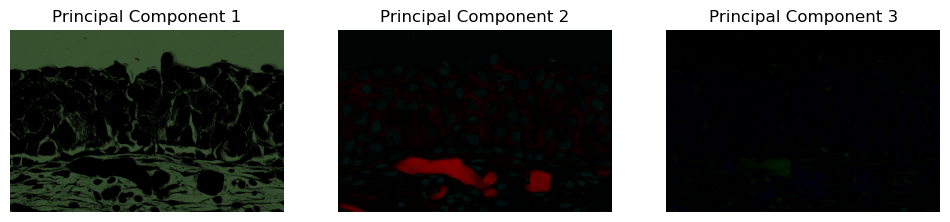

In [26]:
plt.figure(figsize=(12, 4))

for i in range(3):
    reconstructed_image = np.dot(pca.transform(flattened_array)[:, i].reshape(-1, 1),
                                  pca.components_[i].reshape(1, -1))
    reconstructed_image = reconstructed_image.reshape(height, width, channels)

    reconstructed_image = np.clip(reconstructed_image, 0, 255).astype(np.uint8)
    
    plt.subplot(1, 3, i + 1)
    plt.imshow(reconstructed_image)
    plt.title(f'Principal Component {i + 1}')
    plt.axis('off')

plt.show()

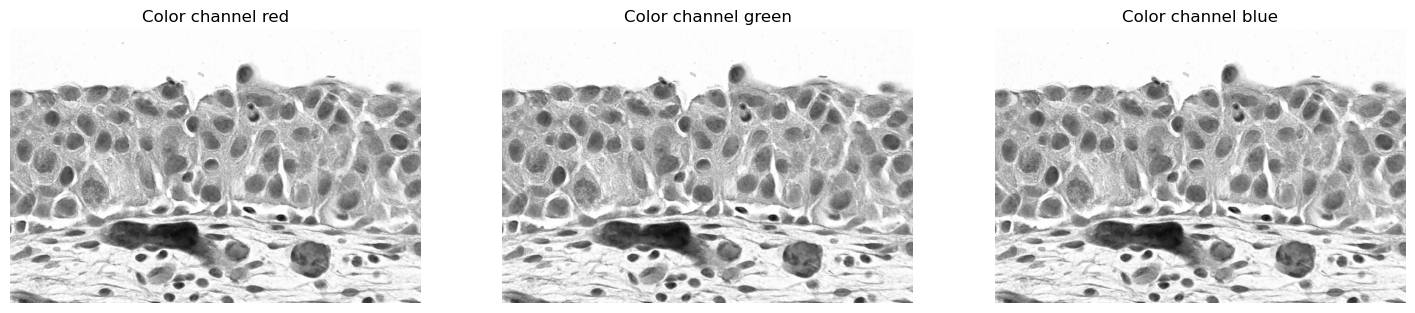

In [46]:
colors = ['red', 'green', 'blue']
plt.figure(figsize=(18, 12))
for channel in range(channels):
    color_channel = carcinoma_array[:, :, i].reshape(height, width)
    plt.subplot(1, 3, channel + 1)
    plt.imshow(color_channel, cmap='gray')
    plt.title(f'Color channel {colors[channel]}')
    plt.axis('off')
plt.show()

In [30]:
pca.transform(flattened_array).shape

(1704534, 3)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])